<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1-[30-marks]" data-toc-modified-id="Question-1-[30-marks]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1 [30 marks]</a></span></li><li><span><a href="#Question-2-[30-marks]" data-toc-modified-id="Question-2-[30-marks]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2 [30 marks]</a></span></li><li><span><a href="#Question-3-[40-marks]" data-toc-modified-id="Question-3-[40-marks]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 3 [40 marks]</a></span></li></ul></div>

# Computational Mathematics <a class="tocSkip">

## 2023/24 Assessment - solutions <a class="tocSkip">

## Release: 10AM Thursday 2 November 2023 <a class="tocSkip">

## Deadline: 5PM Friday 3 November 2023 <a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module "Computational Mathematics" for year 2023/24.


- **This is independent work, you cannot work in groups.**


- This notebook contains three questions. Please answer all questions.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use any library we used in lectures, and you may reuse any code from lectures and homeworks. If you use an algorithm not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - **please submit a version where you have run all of the cells and all the outputs/plots etc are visible without the marker having to run the notebook themselves**.
    
    

- If you are happy to write down your mathematical work in the form of Latex directly within this notebook then feel free to do this.


- Alternatively you may if you choose submit parts of your answers via **scans or photos of hand written pages** - feel free to use this option in particular for supplementary sketches, equations or where I have asked you to complete a task with "pen and paper". You will not be marked down for not embedding equations into your markdown cells. Please make sure that the question number each sheet you scan refers to is very clear. Even if you embed the images within the notebook, please also commit the images files to your github submission.

In [1]:
# update as necessary for your solutions
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.interpolate as si
from mpltools import annotation
import scipy.integrate

# Question 1 [30 marks]

Consider the following two statements

<br>

1. All models are wrong, but some are useful.


2. A model may get the right answer for the wrong reason.


<br>

Where here we interpret a "model" as a piece of code written to provide a synthetic representation of some real world phenomena.

<br>

- (a) Explain what each of these two statements means and why they are important. 

<br>

- (b) What can we as "model" developers do to mitigate the issues that may be implied by these two statements.

<br>

- (c) Explain the concepts of code verification, solution verification, model validation and model calibration. Use your own invented example to support your answers, where your model can be written in the form of a solution to a linear system.


# Question 2 [30 marks]

Consider a function of one independent variable: $f(x)$.

<br>

The first-order forward difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x} $$

The second-order central difference approximation to the derivative of $f$ at location $x$ is given by 

$$ f'(x)\approx \frac{f(x+\Delta x)-f(x - \Delta x)}{2 \Delta x} $$

The fourth-order central difference approximation to the derivative of $f$ at location $x$ is given by

$$ f'(x)\approx \frac{-f(x + 2\Delta x) + 8 f(x+\Delta x)- 8 f(x - \Delta x) + f(x - 2\Delta x)}{12 \Delta x} $$

<br>

- Use Taylor series analyses to confirm the orders of accuracies of the above approximations.

<br>

- Implement these approximations in code, and verify your implementations using the fact that

$$\left. \frac{d}{dx} \exp (x) \right|_{x=1} = \exp(1) $$

- Explain why such a verification exercise give you faith that your implementations are correct.

<br>

- Demonstrate what happens if you take $\Delta x$ values that are too large or too small, i.e. as $\Delta x\rightarrow 0 $ and $\Delta x\rightarrow \infty $. Comment on whether the behaviour you observe is what you expect, and why?

# Question 3 [40 marks]

Consider the following function over the interval $[-1,1]$. 

In [8]:
def our_func(x):
    # you can vary the 100 that appears below to change a key behaviour of this function
    # feel free to update this function to pass it in as a variable
    return 1.0 + (0.2 / (1.0 + (100.0 * x**2)))



This function has been chosen because it is challenging to interpolate and to numerically integrate due to its rapid variation around $x=0$.

But varying the number 100 that appears in this formula we can make it more/less of a challenging problem to interpolate/integrate.

This is a two part question on (a) interpolation and (b) quadrature.

Note that we can use Sympy to differentiate this function and to provide indefinite and definite integrals to this function as follows

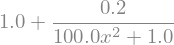

In [10]:

# import Python's symbolic math library
import sympy as sym
# print maths nicely:
sym.init_printing()
# define the 'symbols' that will be our variables/parameters
x = sym.symbols('x')
# define a function 
expr = 1.0 + (0.2 / (1.0 + (100.0 * x**2))) 
# print it out to check it's correct
expr

In [11]:
# this is its indefinite integral
sym.integrate(expr,x)

In [12]:
# and this is its definite integral between bounds -1 and 1 - we store it in variable true_int
# for later use in computing errors.
true_int = sym.integrate(expr,(x,-1,1))
print(true_int)

2.05884510697215


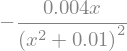

In [13]:
# if you wanted to differentiate once, this is how you could do it
sym.diff(expr, x)

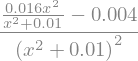

In [14]:
# and the second derivative
sym.diff(expr, x, x)
# and so on

(a) Interpolation

- Firstly plot the function and explain how making the 100 that appears in the function larger and smaller (e.g. try halving and doubling it) changes the function's behaviour and why this behaviour makes this a challenging problem to interpolate. Please only consider piecewise polynomial interpolation with relatively low order polynomials within this question (you do not need to consider the "Runge phenomena" mentioned in class).

<br>


- Now use piecewise polynomial interpolation to approximate the function, demonstrating how the error in your approximation varies with number of "pieces" (i.e. sub intervals) and polynomial order.

<br>


- Given that this function varies a lot in the middle of our interval, but less so away from the origin, investigate how you might be able to use non uniform sized sub-intervals in order to balance accuracy in your approximation vs the number of sub-intervals or function evaluations.

(b) Quadrature

- Use some of the methods we considered in lectures to approximate the definite integral to this function over the interval stated above. Compare their performance in terms of error vs number of sub-intervals.

<br>


- How does the convergence analysis change if you consider error vs number of function evaluations? By considering the implementations of the Trapezoidal and Simpsons rules from lectures, how might you be able to update our basic implementations in order to minimise function evaluations (e.g. through re-use in one sub interval of function evaluations from the previous sub-interval) - try implementing and verifying these ideas.

<br>


- Investigate the use of non-uniform sub-interval size in order to further optimise the error vs number of function evaluations relationship.